<a href="https://colab.research.google.com/github/davidofitaly/neural_network/blob/main/04_classification/01_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()

tf.__version__

'2.17.0'

###Data loading and initial exploration

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,  54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236, 255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196, 200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199, 201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,   0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250, 245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,   0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,  73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,   0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,   0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,   0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243, 139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,   0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,  60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,   0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,  94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,   0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248, 245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,   0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197, 200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206, 204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206, 205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205, 206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206, 205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207, 204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208, 205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209, 206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207, 205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207, 205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207, 205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206, 206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204, 207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 210, 207, 208, 206, 209, 213, 212, 211, 207, 210, 197, 207, 124,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 172, 210, 203, 201, 199, 204, 207, 205, 204, 201, 205, 197, 206, 127,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 188, 221, 214, 234, 236, 238, 244, 244, 244, 240, 243, 214, 224, 162,   0,   2

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

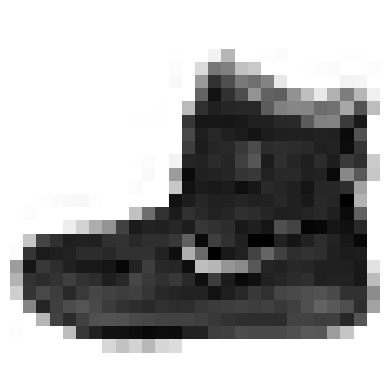

In [ ]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

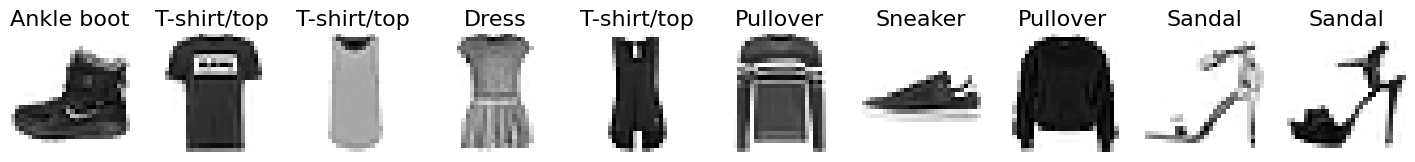

In [ ]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

plt.figure(figsize=(18,13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i -1]], color='black', fontsize=16)
plt.show()

###Model construction

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.6391 - loss: 8.6373 - val_accuracy: 0.6186 - val_loss: 0.9825
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.6253 - loss: 0.9522 - val_accuracy: 0.7025 - val_loss: 0.8431
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6963 - loss: 0.7879 - val_accuracy: 0.7209 - val_loss: 0.7378
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7060 - loss: 0.7571 - val_accuracy: 0.7146 - val_loss: 0.7115
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7068 - loss: 0.7463 - val_accuracy: 0.7258 - val_loss: 0.8124
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7132 - loss: 0.7456 - val_accuracy: 0.7125 - val_loss: 0.7845
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7130 - loss: 0.7360 - val_accuracy: 0.6787 - val_loss: 0.9275
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7159 - loss: 0

In [ ]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.637688,2.807088,0.618583,0.982482,0
1,0.648458,0.907308,0.702500,0.843141,1
2,0.699167,0.779362,0.720917,0.737824,2
3,0.709250,0.754647,0.714583,0.711468,3
4,0.710250,0.746944,0.725833,0.812426,4
5,0.713604,0.736282,0.712500,0.784526,5
6,0.714625,0.740353,0.678750,0.927481,6
7,0.717375,0.725833,0.709083,0.754397,7
8,0.717604,0.728383,0.727250,0.820813,8
9,0.717875,0.724267,0.720583,0.746249,9


###Model evaluation

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and loss')
fig.show()

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)
print(test_loss)

0.7143999934196472
0.760854959487915


###Model-based prediction

In [44]:
predictions = model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.            , 0.            , 0.            , ..., 0.30440173    , 0.            , 0.5899276     ],
       [0.032233182   , 0.005454206   , 0.3387876     , ..., 0.004152502   , 0.021744266   , 0.0010314322  ],
       [0.            , 0.99999815    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.030994358   , 0.000000018903, 0.000026304027, ..., 0.            , 0.8788546     , 0.            ],
       [0.            , 0.99998385    , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.01436623    , 0.0065002586  , 0.000000000002, ..., 0.14825246    , 0.15502632    , 0.032786302   ]], dtype=float32)

In [45]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.105671,0.000000,0.304402,0.000000,0.589928
1,0.032233,0.005454,0.338788,0.034401,0.320391,0.007705,0.234099,0.004153,0.021744,0.001031
2,0.000000,0.999998,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.541781,0.000010,0.004434,0.086173,0.000402,0.000000,0.346993,0.000000,0.020206,0.000000


In [47]:
predictions_cls = np.argmax(predictions_df, axis=1)
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

###Exploring prediction

In [59]:
#@title Wybierz indeks zdjęcia:
idx = 7259 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v',
                     marker_color=color))


fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)
